In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Create a network using Stochastic Block Model

In [ ]:
sizes = np.array([10,10,20]) #sizes of the components
c = [0] * sizes[0] + [1] * sizes[1] + [2] * sizes[2] #for coloring
communities = [np.arange(sizes[:i].sum(),sizes[:i+1].sum()) for i in range(len(sizes))] # for modularity
probs = np.array([[0.65, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]]) # probability matrix
G = nx.stochastic_block_model(sizes, probs, seed=0)

In [ ]:
print(c)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
print(communities)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])]


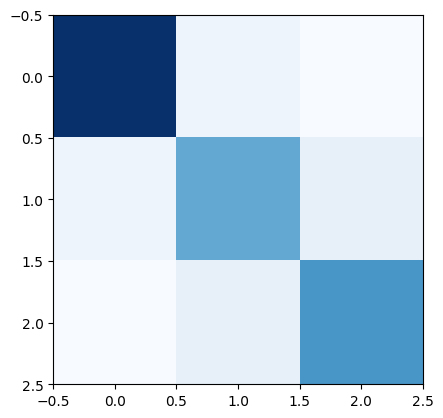

In [ ]:
plt.imshow(probs,cmap='Blues');

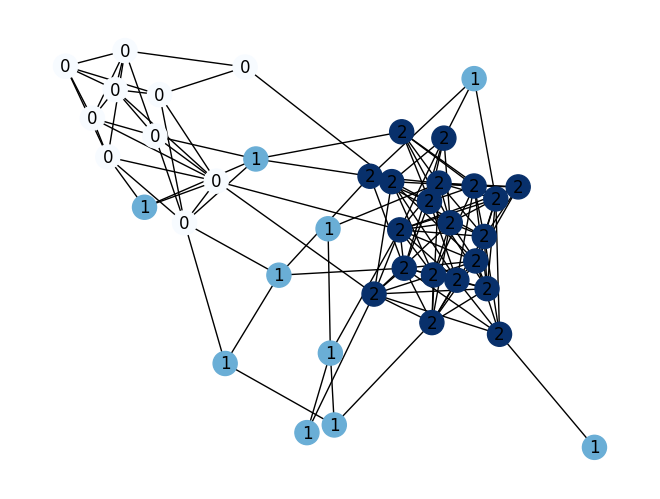

In [ ]:
node_labels = [str(c[i]) for i in range(len(G.nodes))]
nx.draw(G,with_labels=True, node_color=c,labels=dict(zip(G.nodes(), node_labels)),cmap='Blues')

## Measure the modularity

In [ ]:
nx.community.modularity(G,communities)

0.3361828915125863

In [ ]:
sizes = np.array([10,10,20])
c = [0] * sizes[0] + [1] * sizes[1] + [2] * sizes[2] #for coloring
communities = [np.arange(sizes[:i].sum(),sizes[:i+1].sum()) for i in range(len(sizes))]
probs = np.array([[1, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1]])
G = nx.stochastic_block_model(sizes, probs, seed=0)

In [ ]:
nx.community.modularity(G,communities)

0.4878826530612245

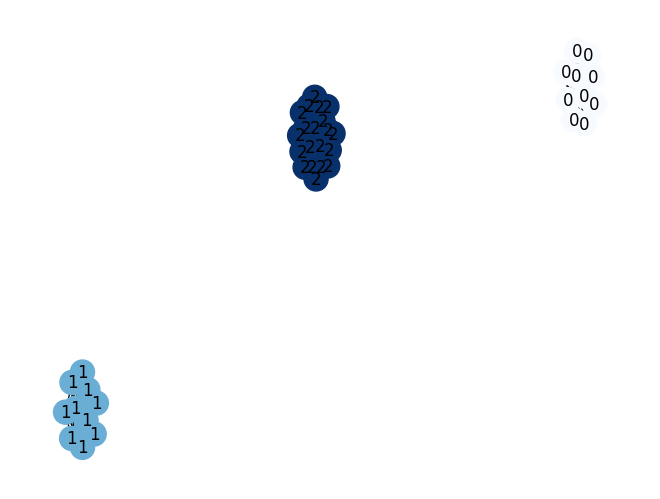

In [ ]:
node_labels = [str(c[i]) for i in range(len(G.nodes))]
nx.draw(G,with_labels=True, node_color=c,labels=dict(zip(G.nodes(), node_labels)),cmap='Blues')

In [ ]:
sizes = np.array([100,100])
c = [0] * sizes[0] + [1] * sizes[1] #for coloring
communities = [np.arange(sizes[:i].sum(),sizes[:i+1].sum()) for i in range(len(sizes))]
probs = np.array([[1, 0.0], [0.0, 1.0]])
G = nx.stochastic_block_model(sizes, probs, seed=0)

In [ ]:
nx.community.modularity(G,communities)

0.5

## Determine the communities using the greedy modularity

In [ ]:
sizes = np.array([10,10,20])
c = [0] * sizes[0] + [1] * sizes[1] + [2] * sizes[2] #for coloring
communities = [np.arange(sizes[:i].sum(),sizes[:i+1].sum()) for i in range(len(sizes))]
probs = np.array([[0.65, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]])
G = nx.stochastic_block_model(sizes, probs, seed=0)

In [ ]:
comm = nx.community.greedy_modularity_communities(G)

In [ ]:
print(nx.community.modularity(G,communities))
print(nx.community.modularity(G,comm))

0.3361828915125863
0.3658108710180441


In [ ]:
c2 = []
for i in range(len(G.nodes)):
    for j in range(len(comm)):
        if i in comm[j]:
            c2.append(j)

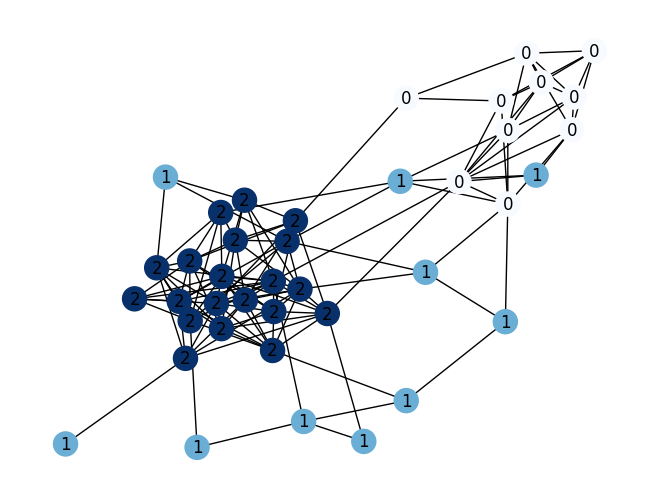

In [ ]:
node_labels = [str(c[i]) for i in range(len(G.nodes))]
pos = nx.layout.spring_layout(G)
nx.draw(G,pos=pos, with_labels=True, \
        node_color=c,labels=dict(zip(G.nodes(), node_labels)),cmap='Blues')

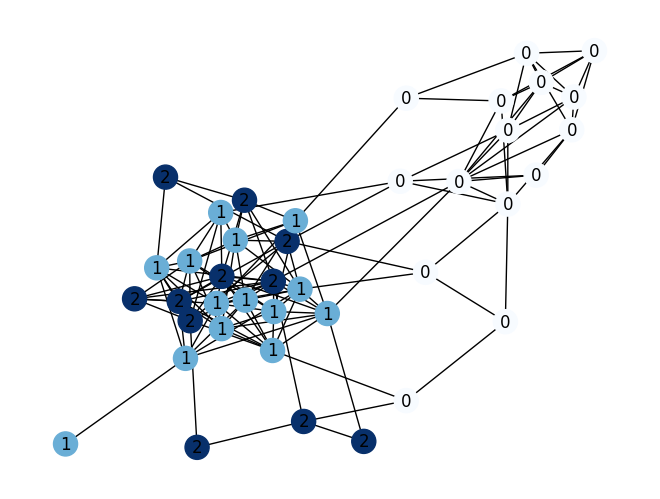

In [ ]:
node_labels = [str(c2[i]) for i in range(len(G.nodes))]
nx.draw(G,pos=pos, with_labels=True, \
        node_color=c2,labels=dict(zip(G.nodes(), node_labels)),cmap='Blues')

In [ ]:
print(c)
print(c2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1]


## Jaccard and Rand index

Let $a_{11}$, ($a_{00}$) be the number of nodes pairs (not) in the
same community in both partitions, $a_{10}$, $a_{01}$ be the number of
nodes pairs present only in one of the partitions. Other words:
$a_{11}$ true positive, $a_{00}$ true negative, $a_{01}, ~a_{10}$
false prediction (pairs here not pairs there)

 *  Rand index:
$$\frac{a_{11}+a_{00}}{a_{11}+a_{00}+a_{01}+a_{10}}$$
 * Jaccard index
$$\frac{a_{11}}{a_{11}+a_{01}+a_{10}}$$


In [ ]:
a = np.zeros((2,2), dtype=int)
nodes = list(G.nodes())

In [ ]:
for i in nodes:
  for j in nodes:
    if i == j: continue
    if c[i] == c[j]:
      i1 = 1
    else:
      i1 = 0
    if c2[i] == c2[j]:
      i2 = 1
    else:
      i2 = 0
    a[i1][i2] += 1
print(a)

[[818 182]
 [240 320]]


In [ ]:
# Jaccard index:
print(a[1,1]/(a[1,1]+a[0,1]+a[1,0]))

0.431266846361186


In [ ]:
# Rand index:
print((a[1,1]+a[0,0])/(a[1,1]+a[0,0]+a[0,1]+a[1,0]))

0.7294871794871794


Girvan-Newman Communities:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 18]
[10]
[11, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Modularity of Girvan-Newman communities: 0.33796502561817776


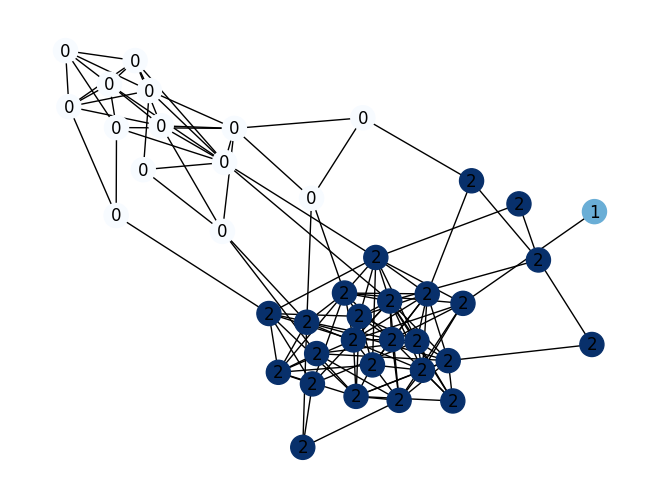

In [ ]:

communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

# Print the communities found by Girvan-Newman
print("Girvan-Newman Communities:")
for community in next_level_communities:
  print(list(community))

# You can also calculate modularity for the Girvan-Newman communities
modularity_gn = nx.community.modularity(G, next_level_communities)
print("Modularity of Girvan-Newman communities:", modularity_gn)

# You can visualize the communities found by Girvan-Newman
c_gn = []
for i in range(len(G.nodes)):
  for j in range(len(next_level_communities)):
    if i in next_level_communities[j]:
      c_gn.append(j)

node_labels = [str(c_gn[i]) for i in range(len(G.nodes))]
pos = nx.layout.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_color=c_gn, labels=dict(zip(G.nodes(), node_labels)), cmap='Blues')
plt.show()


In [ ]:
# prompt: install infomap in google colab

!pip install infomap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.8/264.8 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for infomap: filename=infomap-2.8.0-cp310-cp310-linux_x86_64.whl size=7695884 sha256=e6cbeb8d505da2226e114601569f1495b8de2564341cee20ca9dbef666af1a15
  Stored in directory: /root/.cache/pip/wheels/b5/0c/9b/9816a0207b931219a0c5b2edc14d84099ddd57f7097f926b16
Successfully built infomap


In [ ]:
# prompt: use infomap do determine communities in G

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import infomap

# Assuming G is defined from the previous code

# Create an Infomap object
im = infomap.Infomap("--two-level")

# Add the nodes and edges to the Infomap object
for u, v in G.edges():
    im.addLink(u, v)

# Run the Infomap algorithm
im.run()

im.get_modules()


{0: 2,
 1: 2,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 1,
 11: 3,
 12: 2,
 13: 3,
 14: 2,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 1,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1}

In [ ]:
list(im.get_modules().values())

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

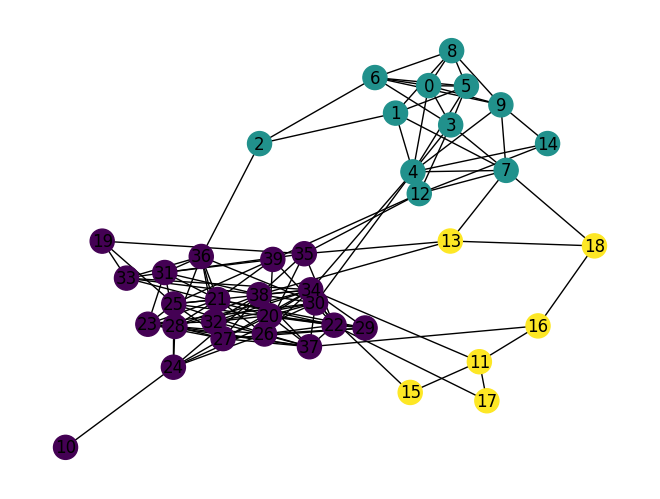

In [ ]:
nx.draw(G, with_labels=True, node_color=list(im.get_modules().values()))

plt.show()


## Load the Zachari karate club data

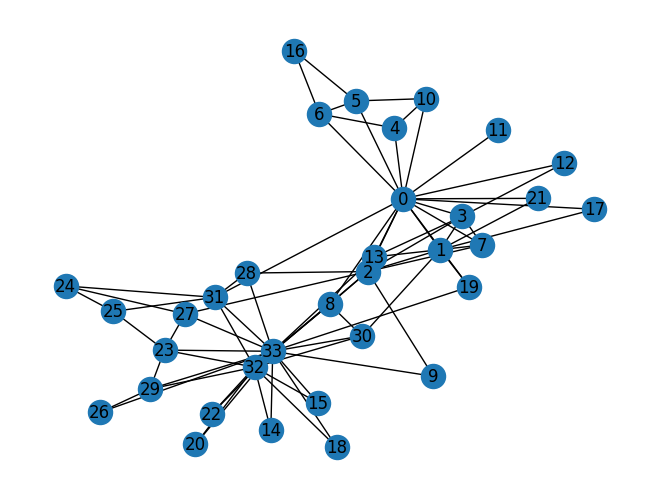

In [ ]:
# prompt: load the zachari karate club data into a networkx graph

import networkx as nx

# Load the Zachary Karate Club dataset
G = nx.karate_club_graph()

nx.draw(G, with_labels=True)


In [ ]:
club_membership = nx.get_node_attributes(G, 'club')
club_membership

{0: 'Mr. Hi',
 1: 'Mr. Hi',
 2: 'Mr. Hi',
 3: 'Mr. Hi',
 4: 'Mr. Hi',
 5: 'Mr. Hi',
 6: 'Mr. Hi',
 7: 'Mr. Hi',
 8: 'Mr. Hi',
 9: 'Officer',
 10: 'Mr. Hi',
 11: 'Mr. Hi',
 12: 'Mr. Hi',
 13: 'Mr. Hi',
 14: 'Officer',
 15: 'Officer',
 16: 'Mr. Hi',
 17: 'Mr. Hi',
 18: 'Officer',
 19: 'Mr. Hi',
 20: 'Officer',
 21: 'Mr. Hi',
 22: 'Officer',
 23: 'Officer',
 24: 'Officer',
 25: 'Officer',
 26: 'Officer',
 27: 'Officer',
 28: 'Officer',
 29: 'Officer',
 30: 'Officer',
 31: 'Officer',
 32: 'Officer',
 33: 'Officer'}

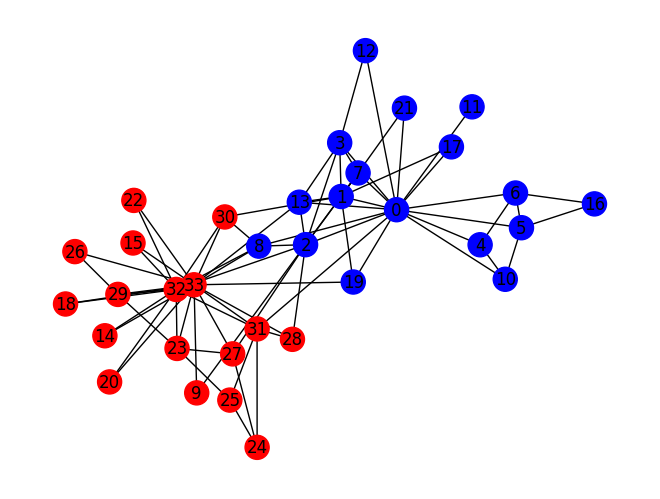

In [ ]:
# prompt: official division in zachari karate club

import networkx as nx
import matplotlib.pyplot as plt

# Load the Zachary Karate Club dataset
G = nx.karate_club_graph()

# Get the club membership for each node
club_membership = nx.get_node_attributes(G, 'club')

# Create a dictionary to map nodes to their club
node_to_club = {node: club for node, club in club_membership.items()}

# Assign a color to each club
club_colors = {'Mr. Hi': 'blue', 'Officer': 'red'}

# Create a list of node colors based on club membership
node_colors = [club_colors[club] for club in node_to_club.values()]

# Draw the graph with colored nodes based on club
nx.draw(G, with_labels=True, node_color=node_colors)

plt.show()


In [ ]:
# prompt: load the network in facebook_combined.txt

import networkx as nx
import matplotlib.pyplot as plt

# Load the network from the file
G = nx.read_edgelist("/content/drive/MyDrive/AIT-Networks/Week06/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

# You can now work with the loaded graph G
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Example: Draw the graph (might be slow for large graphs)
#nx.draw(G, with_labels=False, node_size=10)
#plt.show()


Number of nodes: 4039
Number of edges: 88234


In [ ]:
np.histogram(list(dict(G.degree()).values()),bins=100)

(array([1041,  772,  533,  350,  253,  188,  168,  113,   86,   86,   67,
          73,   46,   44,   33,   41,   35,   34,   35,   18,    4,    6,
           4,    1,    1,    0,    0,    1,    1,    0,    0,    0,    0,
           1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,    0,    0,    1,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1]),
 array([1.00000e+00, 1.14400e+01, 2.18800e+01, 3.23200e+01, 4.27600e+01,
        5.32000e+01, 6.36400e+01, 7.40800e+01, 8.45200e+01, 9.49600e+01,
        1.05400e+02, 1.15840e+02, 1.26280e+02, 1.36720e+02, 1.47160e+02,
        1.57600e+02, 1.68040e+02, 1.78480e+02, 1.88920e+02, 1.99360e+02,
        2.09800e+02, 2.202

## Tasks:
Easy ones:

 1. Use the Karate club data and perform community detection using different methods
 2. Color similaryly the ones which are always in the same community
 3. Color the ones which are mostly in the same community

More involved:
 1. Load the `facebook_combined.txt` data
 2. (you might not want to plot it as it may take minutes)
 3. Find egos with degree larger than 100
 4. Create the egocentric network of these.
 5. Find the communities using your method of preference
 6. Plot the communities colored according to the communities

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
G = nx.read_edgelist("/content/drive/MyDrive/AIT-Networks/Week06/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [ ]:
# Find egos with degree larger than 100
egos = [node for node, degree in G.degree() if degree > 200]
egos

[0,
 107,
 348,
 1684,
 1912,
 483,
 1086,
 1199,
 1352,
 1431,
 1584,
 1589,
 1663,
 1730,
 1746,
 1768,
 1800,
 1827,
 1888,
 2543,
 3437,
 1941,
 2047,
 2266,
 2347,
 1985,
 1993,
 2078,
 2123,
 2142,
 2206,
 2218,
 2229,
 2233,
 2240,
 2410,
 2464,
 2507,
 2560,
 2611]

In [ ]:
egocentric_networks = []
for ego in egos:
  ego_network = nx.ego_graph(G, ego)
  egocentric_networks.append(ego_network)



In [ ]:
colorMapF = lambda degree : "red" if degree > 100 else "green"

colorMap = [colorMapF(degree) for node, degree in G.degree()]
# create ego network
hub_ego = nx.ego_graph(G, egos[0])

i = 0
for eachNetwork in egocentric_networks:
  print(f"Number of nodes in the egocentric network {egos[i]}: {eachNetwork.number_of_nodes()}")
  print(f"Number of edges in the egocentric network {egos[i]}: {eachNetwork.number_of_edges()}")
  i+=1

# showing the ego network
#nx.draw(hub_ego, with_labels=True)

plt.show()

Number of nodes in the egocentric network 0: 348
Number of edges in the egocentric network 0: 2866
Number of nodes in the egocentric network 107: 1046
Number of edges in the egocentric network 107: 27795
Number of nodes in the egocentric network 348: 230
Number of edges in the egocentric network 348: 3441
Number of nodes in the egocentric network 1684: 793
Number of edges in the egocentric network 1684: 14817
Number of nodes in the egocentric network 1912: 756
Number of edges in the egocentric network 1912: 30780
Number of nodes in the egocentric network 483: 232
Number of edges in the egocentric network 483: 4525
Number of nodes in the egocentric network 1086: 206
Number of edges in the egocentric network 1086: 7409
Number of nodes in the egocentric network 1199: 218
Number of edges in the egocentric network 1199: 10714
Number of nodes in the egocentric network 1352: 235
Number of edges in the egocentric network 1352: 11454
Number of nodes in the egocentric network 1431: 221
Number of